# **Deep Learning Project: Street View Housing Number Digit Recognition**



--------------
## **Dataset**
--------------

The original SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It was originally created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. However, it is also one of the most popular image recognition datasets used for neural network learning.<br>
A subset of the original data is used here to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps were previously applied to the dataset.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.



## **Importing the necessary libraries**

In [180]:
# basic data and plot functionalities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# deep learning model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, InputLayer, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, AdamW, Adamax
from tensorflow.keras import backend

# For reports, evaluations
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
from numpy import random
import random

## **Load the dataset**

- The data set is a .h5 file.
- The file contains the entire 60k images as well as pre-split into test and train sets.
- A zipped version of the dataset can be downloaded from kaggle:
https://www.kaggle.com/datasets/vinayakshanawad/street-view-housing-number-digit-recognition

In [8]:
!unzip /content/SVHN_kaggle.zip -d my_data

Archive:  /content/SVHN_kaggle.zip
  inflating: my_data/SVHN_single_grey1.h5  


In [11]:
import h5py
hf_file = h5py.File('/content/my_data/SVHN_single_grey1.h5')
hf_file.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

Check the number of images in the training and the testing dataset.

In [12]:
# Convert into numpy arrays
X_test = np.array(hf_file['X_test'])
X_train = np.array(hf_file['X_train'])
X_val = np.array(hf_file['X_val'])
y_test = np.array(hf_file['y_test'])
y_train = np.array(hf_file['y_train'])
y_val = np.array(hf_file['y_val'])

# The # images in the different data sets.
print(f"The number of images in the different data sets:\nX_test:\t \t{X_test.shape[0]}\nX_train: \t{X_train.shape[0]}\nX-val: \t\t{X_val.shape[0]}")
print(f"\ny_test: \t{y_test.shape[0]}\ny_train: \t{y_train.shape[0]}\ny_val: \t\t{y_val.shape[0]}")

The number of images in the different data sets:
X_test:	 	18000
X_train: 	42000
X-val: 		60000

y_test: 	18000
y_train: 	42000
y_val: 		60000


**Observation:**

The data came presplit into multiple sets with the suffixes: _val, _test, and _train.
The number of images in each set is 60k, 18k, and 42k, respectively.

The val dataset of 60k images is likely the full, undivided set.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

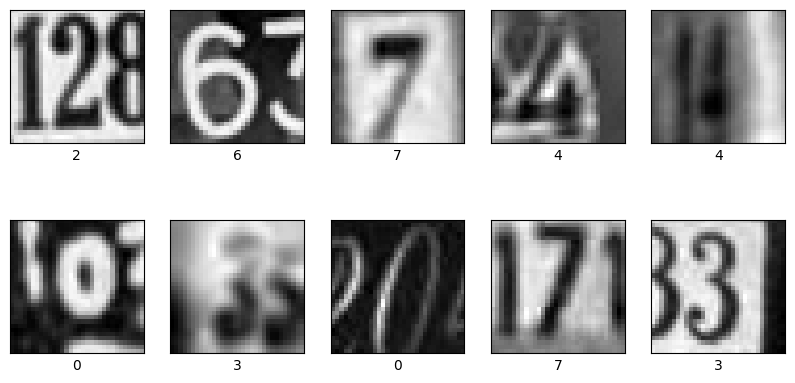

In [13]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [14]:
## Determine the image shape
print(f"A representative item in X_train has the pixel x pixel dimensions: {X_train[100].shape}")

A representative item in X_train has the pixel x pixel dimensions: (32, 32)



The image size is 32 x 32 pixels^2. The 4th dimension containing the color channel is missing. This will have to be added for the CNN models.


### **Normalize the train and the test data**

In [15]:
X_train = X_train /255
X_test = X_test / 255

Print the shapes of Training and Test data

In [16]:
print("Dataset\t\t(# items, pixel height, pixel width)\n")
print(f"X_test: \t{X_test.shape}\nX_train: \t{X_train.shape}\n")
print("*"*50)
print("Dataset\t\t(# items,)")
print(f"\ny_test: \t{y_test.shape}\ny_train: \t{y_train.shape}\n")

Dataset		(# items, pixel height, pixel width)

X_test: 	(18000, 32, 32)
X_train: 	(42000, 32, 32)

**************************************************
Dataset		(# items,)

y_test: 	(18000,)
y_train: 	(42000,)



### **One-hot encode output**

In [17]:
# Confirming the number and identities of the classes
print(f"The classes of numbers found in the y datasets: {np.unique(y_train)}")
print(f"The number of classes in the y datasets: {len(np.unique(y_train))}")

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 10)

print(f"\nThe original shape of y-train:\t\t{y_train.shape}")
print(f"After OHE, the shape changes to:\t{y_train_encoded.shape}\twith the variable name:\ty_train_encoded")
print(f"\nThe original shape of y-train:\t\t{y_test.shape}")
print(f"After OHE, the shape changes to:\t{y_test_encoded.shape}\twith the variable name:\ty_test_encoded")

The classes of numbers found in the y datasets: [0 1 2 3 4 5 6 7 8 9]
The number of classes in the y datasets: 10

The original shape of y-train:		(42000,)
After OHE, the shape changes to:	(42000, 10)	with the variable name:	y_train_encoded

The original shape of y-train:		(18000,)
After OHE, the shape changes to:	(18000, 10)	with the variable name:	y_test_encoded


**Observation:**

Images have the dimensions: 32x32 pixels^2.
The shapes of the image datasets (X_train, X_test) are 3D, lacking the greyscale channel.

The y-train and y_test data contain 10 numbers from 0 to 9.
After the OneHot Encoding, this is reflected in the new dimension added to their shapes.


## **Model Building**

**ANN Model **<br>
Although CNNs are preferred for images, this is an exercise.

In [18]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Build and train a very simple ANN model.**

In [19]:
def nn_model_1():
  # define the structure of the model
  model = Sequential()
  model.add(Flatten(input_shape = (32,32)))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))

  # compile the model
  model.compile(optimizer=Adam(learning_rate = 0.001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [20]:
# call model function
model_1 = nn_model_1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history_1 = model_1.fit(X_train, y_train_encoded, validation_split = 0.2, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
263/263 [==============================] - 3s 4ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 3ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 3ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 3ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 3ms/step - loss: 1.3593 - accuracy: 0.5566 - val_loss: 1.3259 - val_accuracy: 0.5749
Epoch 7/20
263/263 [==============================] - 1s 3ms/step - loss: 1.2905 - accuracy: 0.5834 - val_loss: 1.2542 - val_accuracy: 0.6012
Epoch 

### **Plot the Training and Validation Accuracies.**

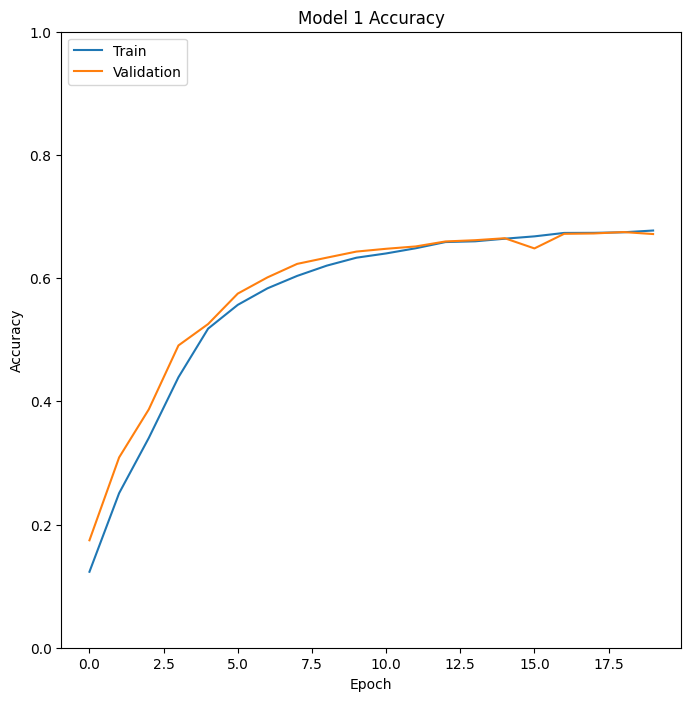

In [22]:
plt.figure(figsize=(8,8))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:**

The training and validation sets reached a max accuracy of ~0.68.

Since the accuracy of validation set nicely overlapped with the training set, overfitting doesn't appear to be an issue.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

### **Build and train a second ANN model with more layers**

In [23]:
#clear the previous model's history from the Keras backend
# Fix the seed again after clearing the backend.
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [24]:
def nn_model_2():
  # define the structure of the model
  model = Sequential()
  model.add(Flatten(input_shape = (32,32)))
  model.add(Dense(256, activation = 'relu'))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dense(10, activation = 'softmax'))

  # compile the model
  model.compile(optimizer=Adam(learning_rate = 0.0005), loss= 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [25]:
# call model function
model_2 = nn_model_2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2

In [26]:
history_2 = model_2.fit(X_train, y_train_encoded, validation_split = 0.2, batch_size = 128, epochs = 30, verbose = 1)

Epoch 1/30
263/263 [==============================] - 5s 6ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3012 - val_accuracy: 0.1063
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 2.1852 - accuracy: 0.1676 - val_loss: 2.0294 - val_accuracy: 0.2526
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 1.7018 - accuracy: 0.3965 - val_loss: 1.5472 - val_accuracy: 0.4911
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 1.3708 - accuracy: 0.5457 - val_loss: 1.2300 - val_accuracy: 0.6051
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 1.2380 - accuracy: 0.5935 - val_loss: 1.1564 - val_accuracy: 0.6318
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 1.1530 - accuracy: 0.6260 - val_loss: 1.0539 - val_accuracy: 0.6600
Epoch 

### **Plot the Training and Validation Accuracies.**

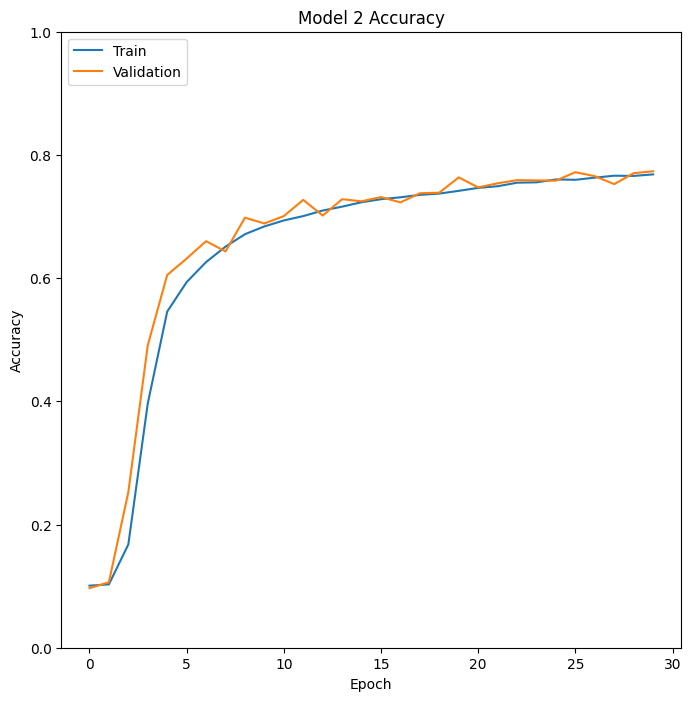

In [27]:
plt.figure(figsize=(8,8))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:**

There was some improvement by adding more dense layers. The accuracy improved to ~0.77, and the loss was reduced down to ~0.77.

The relative performance of the validation set suggests that the model was not overtrained.

## **Test data Predictions**


In [72]:
y_pred_test=model_2.predict(X_test)

563/563 [==============================] - 1s 2ms/step


In [71]:
# reverse the one hot coding & calculate max probability
y_pred_classes = np.argmax(y_pred_test, axis = 1)
y_pred_max_prob = np.max(y_pred_test, axis = 1)

# Confirming the extra dimension added by the OHE has been removed
print(y_pred_classes.shape)
print(y_pred_max_prob.shape)

(18000,)
(18000,)


### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [178]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.34      0.50      1814
           1       0.46      0.91      0.61      1828
           2       0.62      0.77      0.69      1803
           3       0.75      0.49      0.59      1719
           4       0.65      0.80      0.72      1812
           5       0.43      0.89      0.58      1768
           6       0.77      0.50      0.61      1832
           7       0.75      0.75      0.75      1808
           8       0.93      0.37      0.53      1812
           9       0.94      0.39      0.55      1804

    accuracy                           0.62     18000
   macro avg       0.72      0.62      0.61     18000
weighted avg       0.72      0.62      0.61     18000



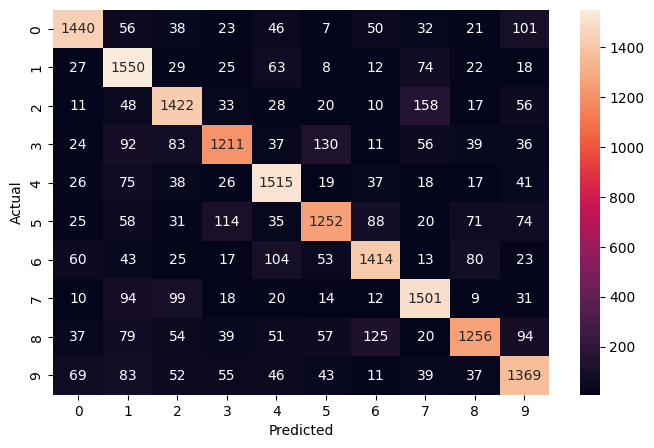

In [31]:
cm=confusion_matrix(y_test, y_pred_classes)
y_classes = range(0,10)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = y_classes, yticklabels=y_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted');

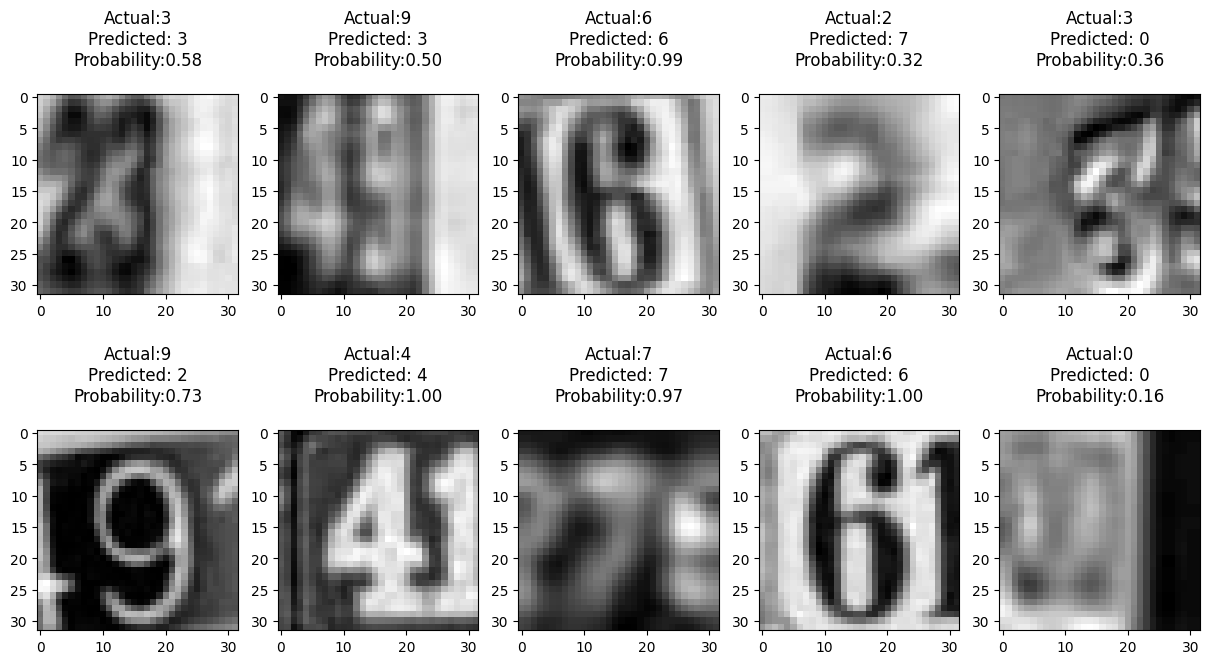

In [32]:
# Look at a sample of test predictions
y_pred_inverse = np.argmax(y_pred_test, axis=1)
y_test_inverse = np.argmax(y_test_encoded, axis=1)
rows = 2
cols =5
fig = plt.figure(figsize=(15,8))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_test))
    ax = fig.add_subplot(rows, cols, i*rows + j+1)
    ax.imshow(X_test[random_index, :], cmap=plt.cm.binary)
    pred_label = y_pred_inverse[random_index]
    pred_prob = y_pred_max_prob[random_index]
    true_label = y_test_inverse[random_index]
    ax.set_title(f"Actual:{true_label}\nPredicted: {pred_label}\nProbability:{'%.2f' %pred_prob}\n")


**Final Observations:**

The second model performed better than the first, however, there is still ~25% error. This is suboptimal for any processes requiring high accuracy (e.g. license plate readers). The model needs further optimization.
Overfitting was not an issue with either of these 2 models.

## **Using Convolutional Neural Networks**

## **Data preparation**

- Reshape the train and the test dataset because CNNs required 4D arrays for the input data.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [33]:
# adding the 4th dimension: grey channel
print(f"The original shape of X_train:\t{X_train.shape}")
X_train_cnn = tf.expand_dims(X_train, -1)
print(f"The new shape of X_train:\t{X_train_cnn.shape}  New variable name: X_train_cnn")

print(f"\nThe original shape of X_test:\t{X_test.shape}")
X_test_cnn = tf.expand_dims(X_test, -1)
print(f"The new shape of X_test:\t{X_test_cnn.shape}  New variable name: X_test_cnn")

The original shape of X_train:	(42000, 32, 32)
The new shape of X_train:	(42000, 32, 32, 1)  New variable name: X_train_cnn

The original shape of X_test:	(18000, 32, 32)
The new shape of X_test:	(18000, 32, 32, 1)  New variable name: X_test_cnn


Normalize inputs from 0-255 to 0-1

In [34]:
X_train_cnn = X_train_cnn/255
X_test_cnn = X_test_cnn/255

Print New shape of Training and Test

In [35]:
print("Dataset\t\t(# items, pixel height, pixel width)\n")
print(f"X_test_cnn: \t{X_test_cnn.shape}\nX_train_cnn: \t{X_train_cnn.shape}")
print("\nDataset\t\t(# items,)")
print(f"\ny_test: \t{y_test.shape}\ny_train: \t{y_train.shape}\n")

print(np.unique(y_train))

Dataset		(# items, pixel height, pixel width)

X_test_cnn: 	(18000, 32, 32, 1)
X_train_cnn: 	(42000, 32, 32, 1)

Dataset		(# items,)

y_test: 	(18000,)
y_train: 	(42000,)

[0 1 2 3 4 5 6 7 8 9]


## **CNN Model Building**


In [88]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Build and train a simple CNN model**

In [92]:
def cnn_model_1():
   # define the structure of the model
  model = Sequential()
  model.add(InputLayer(input_shape = (32,32,1)))

  model.add(Conv2D(16, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))

  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())

  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Dense(10, activation = 'softmax'))

  # compile the model
  model.compile(optimizer=Adam(learning_rate = 0.001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [93]:
# call model function
model_cnn_1 = cnn_model_1()
model_cnn_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [94]:
history_cnn_1 = model_cnn_1.fit(X_train_cnn, y_train_encoded, validation_split = 0.2, batch_size = 32, epochs = 20, verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 5s 4ms/step - loss: 2.3031 - accuracy: 0.1014 - val_loss: 2.3042 - val_accuracy: 0.0974
Epoch 2/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.3030 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 3/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.3032 - accuracy: 0.1025 - val_loss: 2.3032 - val_accuracy: 0.0976
Epoch 4/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.3032 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.1014
Epoch 5/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.3029 - accuracy: 0.1032 - val_loss: 2.3029 - val_accuracy: 0.0969
Epoch 6/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.3031 - accuracy: 0.0992 - val_loss: 2.3036 - val_accuracy: 0.0974
Epoch 7/20
1050/1050 [==============================] - 4s 3ms/step - loss: 2.3032 - accuracy: 0.0970 - val_loss: 2.3031 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**

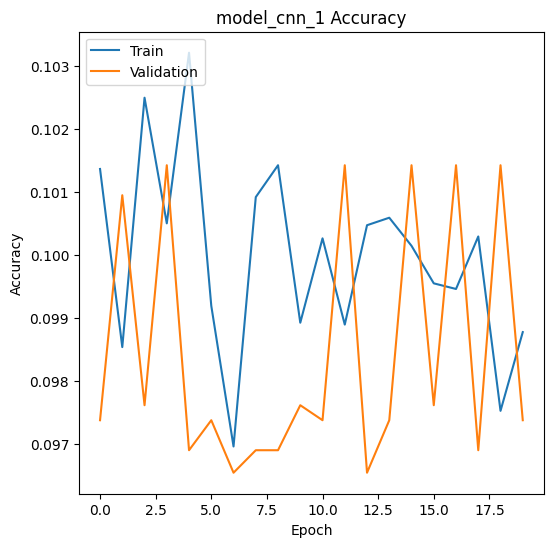

In [150]:
plt.figure(figsize=(6, 6))
plt.plot(history_cnn_1.history['accuracy'])
plt.plot(history_cnn_1.history['val_accuracy'])
plt.title('model_cnn_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

**Observations:**
This model was worse than either ANN model.


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Build and train a second, more complicated CNN model.**

In [146]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [147]:
def cnn_model_2():
   # define the structure of the model
  model = Sequential()
  model.add(InputLayer(input_shape = (32,32,1)))

  model.add(Conv2D(16, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))

  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())

  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))

  model.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))

  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())

  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'softmax'))

  # compile the model
  model.compile(optimizer=Adam(learning_rate = 0.001), loss= 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [148]:
# call model function
model_cnn_2 = cnn_model_2()
model_cnn_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [149]:
history_cnn_2 = model_cnn_2.fit(X_train_cnn, y_train_encoded, validation_split = 0.2, batch_size = 128, epochs = 30, verbose = 1)

Epoch 1/30
263/263 [==============================] - 4s 7ms/step - loss: 1.7749 - accuracy: 0.3470 - val_loss: 2.2727 - val_accuracy: 0.1636
Epoch 2/30
263/263 [==============================] - 1s 5ms/step - loss: 0.7930 - accuracy: 0.7496 - val_loss: 1.8735 - val_accuracy: 0.3768
Epoch 3/30
263/263 [==============================] - 1s 5ms/step - loss: 0.6328 - accuracy: 0.8054 - val_loss: 0.5361 - val_accuracy: 0.8379
Epoch 4/30
263/263 [==============================] - 1s 5ms/step - loss: 0.5704 - accuracy: 0.8272 - val_loss: 0.5161 - val_accuracy: 0.8455
Epoch 5/30
263/263 [==============================] - 1s 5ms/step - loss: 0.5194 - accuracy: 0.8379 - val_loss: 1.6497 - val_accuracy: 0.4501
Epoch 6/30
263/263 [==============================] - 1s 5ms/step - loss: 0.4870 - accuracy: 0.8508 - val_loss: 0.4218 - val_accuracy: 0.8757
Epoch 7/30
263/263 [==============================] - 1s 5ms/step - loss: 0.4734 - accuracy: 0.8544 - val_loss: 0.5737 - val_accuracy: 0.8217
Epoch 

### **Plot the Training and Validation accuracies and write your observations.**

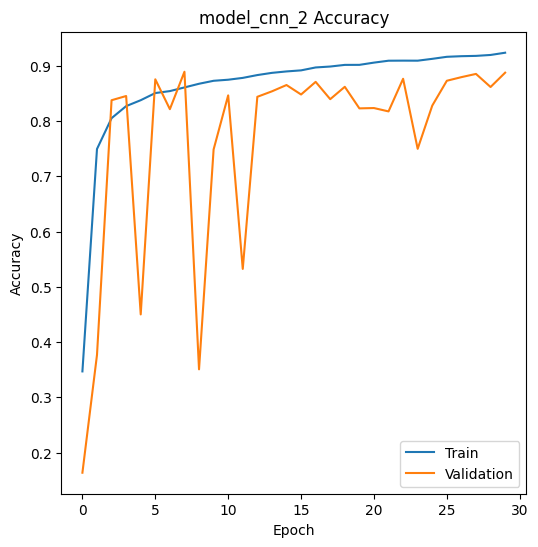

In [152]:
plt.figure(figsize=(6,6))
plt.plot(history_cnn_2.history['accuracy'])
plt.plot(history_cnn_2.history['val_accuracy'])
plt.title('model_cnn_2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

**Observations:**
The training set had accuracies >= 90%. There is a lot of overfitting as the validation set had very inconsistent accuracies.


### **Third Model Architecture**

- Model 2 had good accuracy for the training set, but overfitting was an issue.
- More pooling and dropout layers will be introduced to reduce overfitting.

In [208]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [209]:
def cnn_model_3():
  # define the structure of the model
  model = Sequential()
  model.add(InputLayer(input_shape = (32,32,1)))

  model.add(Conv2D(16, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())

  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())

  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'softmax'))

  # compile the model
  model.compile(optimizer=Adam(learning_rate = 0.0005), loss= 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [210]:
# call model function
model_cnn_3 = cnn_model_3()
model_cnn_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)        0

In [211]:
history_cnn_3 = model_cnn_3.fit(X_train_cnn, y_train_encoded, validation_split = 0.2, batch_size = 128, epochs = 30, verbose = 1)

Epoch 1/30
263/263 [==============================] - 5s 7ms/step - loss: 2.4428 - accuracy: 0.1079 - val_loss: 2.3188 - val_accuracy: 0.0965
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3033 - accuracy: 0.1221 - val_loss: 2.4396 - val_accuracy: 0.1039
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1921 - accuracy: 0.1927 - val_loss: 2.3077 - val_accuracy: 0.1545
Epoch 4/30
263/263 [==============================] - 2s 6ms/step - loss: 1.8460 - accuracy: 0.3460 - val_loss: 1.4072 - val_accuracy: 0.5261
Epoch 5/30
263/263 [==============================] - 2s 6ms/step - loss: 1.5255 - accuracy: 0.4754 - val_loss: 1.1659 - val_accuracy: 0.6173
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.3423 - accuracy: 0.5454 - val_loss: 0.9319 - val_accuracy: 0.6910
Epoch 7/30
263/263 [==============================] - 2s 6ms/step - loss: 1.2436 - accuracy: 0.5837 - val_loss: 1.1578 - val_accuracy: 0.6132
Epoch 

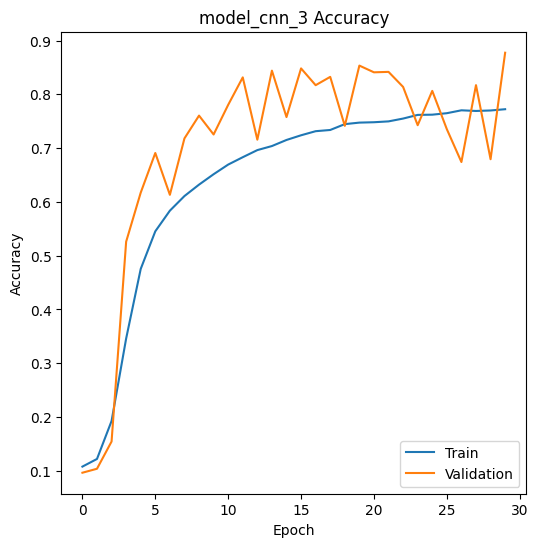

In [212]:
plt.figure(figsize=(6,6))
plt.plot(history_cnn_3.history['accuracy'])
plt.plot(history_cnn_3.history['val_accuracy'])
plt.title('model_cnn_3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

**Observations:**<br>
Although the train set accuracy was slightly reduced, the validation data showed a better match. The overlap of the 2 sets were not as nice as it should be. The fitting was basically done by the 5th epoch.

### **Make predictions on the test data using the third model.**

In [233]:
y_pred_test_cnn_3=model_cnn_3.predict(X_test_cnn)

563/563 [==============================] - 1s 2ms/step


In [234]:
# reverse the one hot coding
y_pred_classes_cnn_3 = np.argmax(y_pred_test_cnn_3 , axis = 1)
y_pred_max_prob_cnn_3 = np.max(y_pred_test_cnn_3 , axis = 1)

# Show the shapes have lost the extra dimension
print(y_test.shape)
print(y_pred_classes_cnn_3.shape)
print(y_pred_max_prob_cnn_3.shape)

(18000,)
(18000,)
(18000,)


In [235]:
print(classification_report(y_test, y_pred_classes_cnn_3))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1814
           1       0.79      0.92      0.85      1828
           2       0.94      0.88      0.91      1803
           3       0.88      0.81      0.84      1719
           4       0.83      0.92      0.87      1812
           5       0.85      0.90      0.88      1768
           6       0.88      0.86      0.87      1832
           7       0.89      0.91      0.90      1808
           8       0.94      0.78      0.85      1812
           9       0.89      0.84      0.86      1804

    accuracy                           0.87     18000
   macro avg       0.88      0.87      0.87     18000
weighted avg       0.88      0.87      0.87     18000



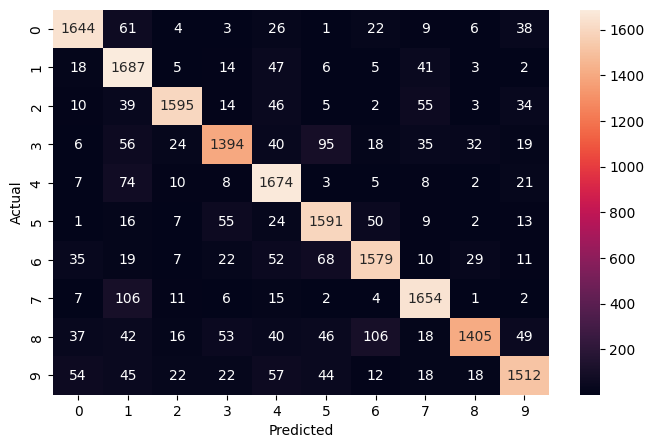

In [236]:
cm=confusion_matrix(y_test, y_pred_classes_cnn_3)
y_classes = range(0,10)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = y_classes, yticklabels=y_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted');

### **Fourth Model Architecture**
- Model 3 had good accuracy for both training and validation sets.
- What happens if only the optimizer is changed?

In [224]:
backend.clear_session()
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [225]:
def cnn_model_4():
  # define the structure of the model
  model = Sequential()
  model.add(InputLayer(input_shape = (32,32,1)))

  model.add(Conv2D(16, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())

  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Conv2D(64, kernel_size = (3, 3), padding = 'same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(BatchNormalization())
  model.add(Flatten())

  model.add(Dense(32))
  model.add(LeakyReLU(alpha=0.1))
  model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'softmax'))

  # compile the model
  model.compile(optimizer=Adamax(learning_rate = 0.0005), loss= 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [226]:
# call model function
model_cnn_4 = cnn_model_4()
model_cnn_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)        0

In [227]:
# Try changing the optimizer from Adam to Adamax
history_cnn_4 = model_cnn_4.fit(X_train_cnn, y_train_encoded, validation_split = 0.2, batch_size = 128, epochs = 30, verbose = 1)

Epoch 1/30
263/263 [==============================] - 4s 7ms/step - loss: 2.5887 - accuracy: 0.1016 - val_loss: 2.3565 - val_accuracy: 0.1014
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3489 - accuracy: 0.1080 - val_loss: 2.3385 - val_accuracy: 0.1069
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3131 - accuracy: 0.1163 - val_loss: 2.2966 - val_accuracy: 0.1254
Epoch 4/30
263/263 [==============================] - 2s 6ms/step - loss: 2.2925 - accuracy: 0.1350 - val_loss: 2.2670 - val_accuracy: 0.1551
Epoch 5/30
263/263 [==============================] - 2s 6ms/step - loss: 2.2518 - accuracy: 0.1610 - val_loss: 2.1616 - val_accuracy: 0.2312
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1546 - accuracy: 0.2169 - val_loss: 2.0647 - val_accuracy: 0.2386
Epoch 7/30
263/263 [==============================] - 2s 6ms/step - loss: 2.0408 - accuracy: 0.2696 - val_loss: 2.0007 - val_accuracy: 0.2667
Epoch 

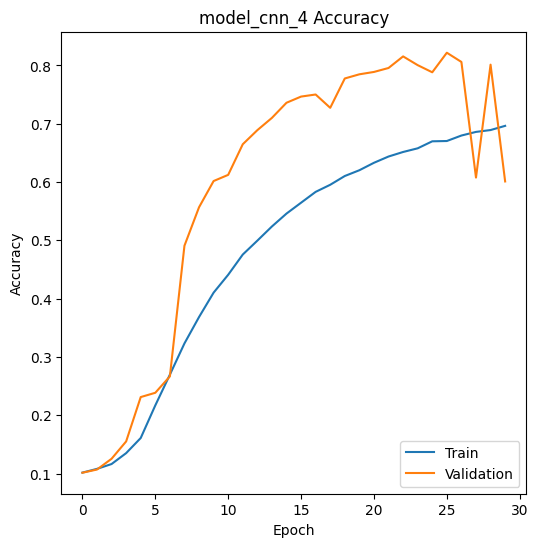

In [228]:
plt.figure(figsize=(6,6))
plt.plot(history_cnn_4.history['accuracy'])
plt.plot(history_cnn_4.history['val_accuracy'])
plt.title('model_cnn_4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

### **Make predictions on the test data using the fourth model.**

In [229]:
y_pred_test_cnn=model_cnn_4.predict(X_test_cnn)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [230]:
# reverse the one hot coding
y_pred_classes_cnn = np.argmax(y_pred_test_cnn , axis = 1)
y_pred_max_prob_cnn = np.max(y_pred_test_cnn , axis = 1)

# Show the shapes have lost the extra dimension
print(y_test.shape)
print(y_pred_classes_cnn.shape)
print(y_pred_max_prob_cnn.shape)

(18000,)
(18000,)
(18000,)


In [231]:
print(classification_report(y_test, y_pred_classes_cnn))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1814
           1       0.33      0.96      0.50      1828
           2       0.97      0.47      0.63      1803
           3       0.79      0.40      0.54      1719
           4       0.62      0.73      0.67      1812
           5       0.95      0.45      0.61      1768
           6       0.65      0.64      0.65      1832
           7       0.59      0.77      0.67      1808
           8       0.88      0.38      0.53      1812
           9       0.86      0.51      0.64      1804

    accuracy                           0.61     18000
   macro avg       0.73      0.61      0.61     18000
weighted avg       0.73      0.61      0.61     18000



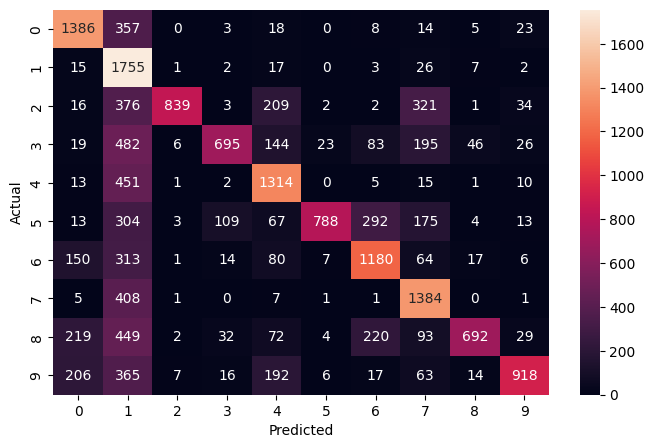

In [232]:
cm=confusion_matrix(y_test, y_pred_classes_cnn)
y_classes = range(0,10)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot = True, fmt = '.0f', xticklabels = y_classes, yticklabels=y_classes)
plt.ylabel('Actual')
plt.xlabel('Predicted');

### **Look at examples of best fit model: Third CNN Model**

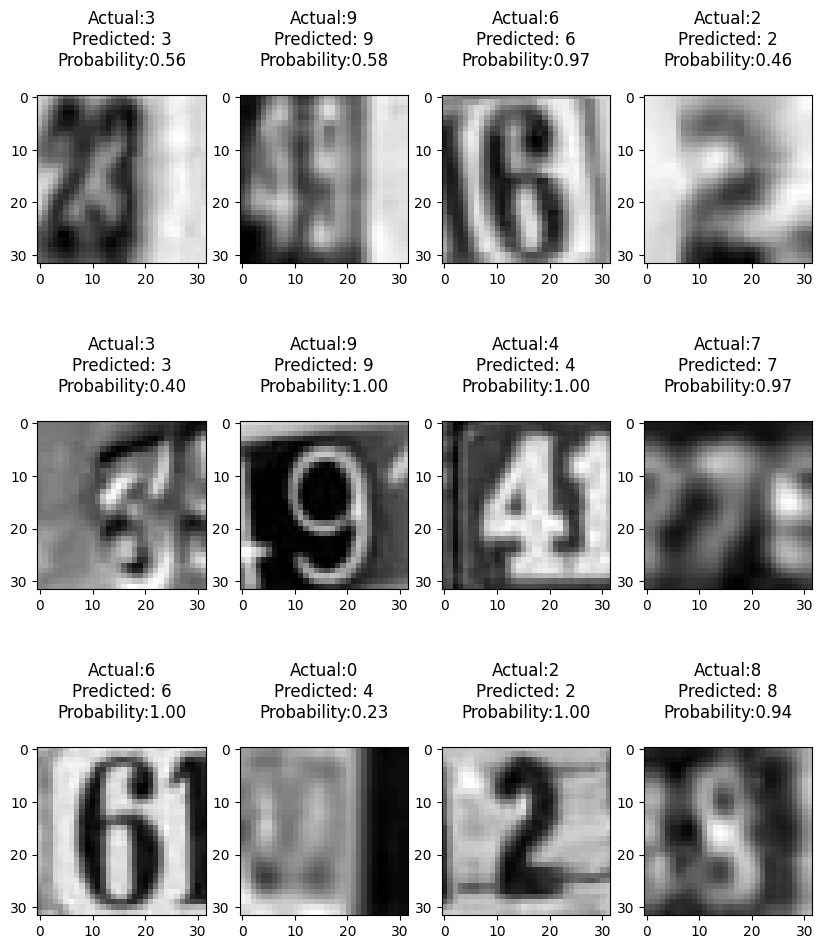

In [237]:
rows = 3
cols =4
fig = plt.figure(figsize=(10,12))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_test))
    ax = fig.add_subplot(rows, cols, i*rows + j+1)
    ax.imshow(X_test[random_index, :], cmap=plt.cm.binary)
    pred_label = y_pred_classes_cnn_3[random_index]
    pred_prob = y_pred_max_prob_cnn_3[random_index]
    true_label = y_test[random_index]
    ax.set_title(f"Actual:{true_label}\nPredicted: {pred_label}\nProbability:{'%.2f' %pred_prob}\n")


### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

Of the six models tested, the CNN model that included the most pooling and dropout layers gave the best results (CNN model 3).

The first model was a simple ANN with 2 hidden layers. Its accuracy was 67%. No overfitting was evident.

Addition of 3 more dense layers along with a dropout and a batch normalization layer improved the ability to assign the correct number to each image by ~10%. No overfitting was evident.

After fitting the test set, the randomly chosen images agreed with an accuracy of 70-80%.

Changing to a simple CNN model was the worst model of all. The training set didn't achieve even 20% accuracy.

For the second CNN model, multiple convolutional layers were added as well as some pooling and dropout layers to minimize overfitting. These changes led to a test set accuracy of 92%, but there was a lot of overfitting.

For the third CNN model, changes were made to reduce overfitting (more pooling and dropout layers) which reduced the test set accuracy to ~86%, but the validation set demonstrated little overfitting. The test set predictions had similar accuracies.

A sample set of images is in agreement with that accuracy rate.<br>

To test if the optimizer could have an effect, the fourth CNN model was the third cnn model using Adamax as he optimizer. This was not an improvement.

If this accuracy rate is sufficient for the client's needs, then we can stop here.
However, number recognition accuracy is likely to be extremely critical for any use cases.

Therefore, the model building needs to be continued. Increasing the size of the dataset can be useful: the larger 600k image dataset  or perhaps using cross validation with the smaller data set.<br>
Different CNN models could be explored. Rather than randomly adding layers, a tuner could be tried to determine optimal neurons/layer, learning rate, and # of layers. Another approach is to use pretrained models.


